## 2. Exploring relationships

### 1. Importing libraries

### 2. Importing data

### 3. Correlation heatmap

### 4. Scatterplot

### 5. Pair plot

### 6. Categorical plot

### 7. Questions

### 8. Hypothesis

#### 1. Importing libraries

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 2. Importing data

In [12]:
path = r'C:\Users\Priya\OneDrive\Documents\CareerFoundry\Data Immersion\Achievement 6\Greenhouse Gas Emissions Analysis\02 Data\Prepared Data'

In [13]:
path

'C:\\Users\\Priya\\OneDrive\\Documents\\CareerFoundry\\Data Immersion\\Achievement 6\\Greenhouse Gas Emissions Analysis\\02 Data\\Prepared Data'

In [14]:
df_emissions = pd.read_csv(os.path.join(path, 'emissions-cleaned.csv'), index_col = False)

Contains public sector information licensed under the Open Government Licence v3.0. License: https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/

#### 3. Correlation heatmap

In [17]:
# Creating a subset for numeric columns
numeric_columns = ['Territorial emissions (kt CO2e)', 'CO2 emissions within the scope of influence of LAs (kt CO2)', 'Mid-year Population (thousands)', 'Area (km2)']

In [18]:
# Creating a correlation matrix
df_emissions[numeric_columns].corr()

,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
Territorial emissions (kt CO2e),1.000000,0.495499,0.084867,0.038602
CO2 emissions within the scope of influence of LAs (kt CO2),0.495499,1.000000,0.138936,0.037362
Mid-year Population (thousands),0.084867,0.138936,1.000000,0.106100
Area (km2),0.038602,0.037362,0.106100,1.000000


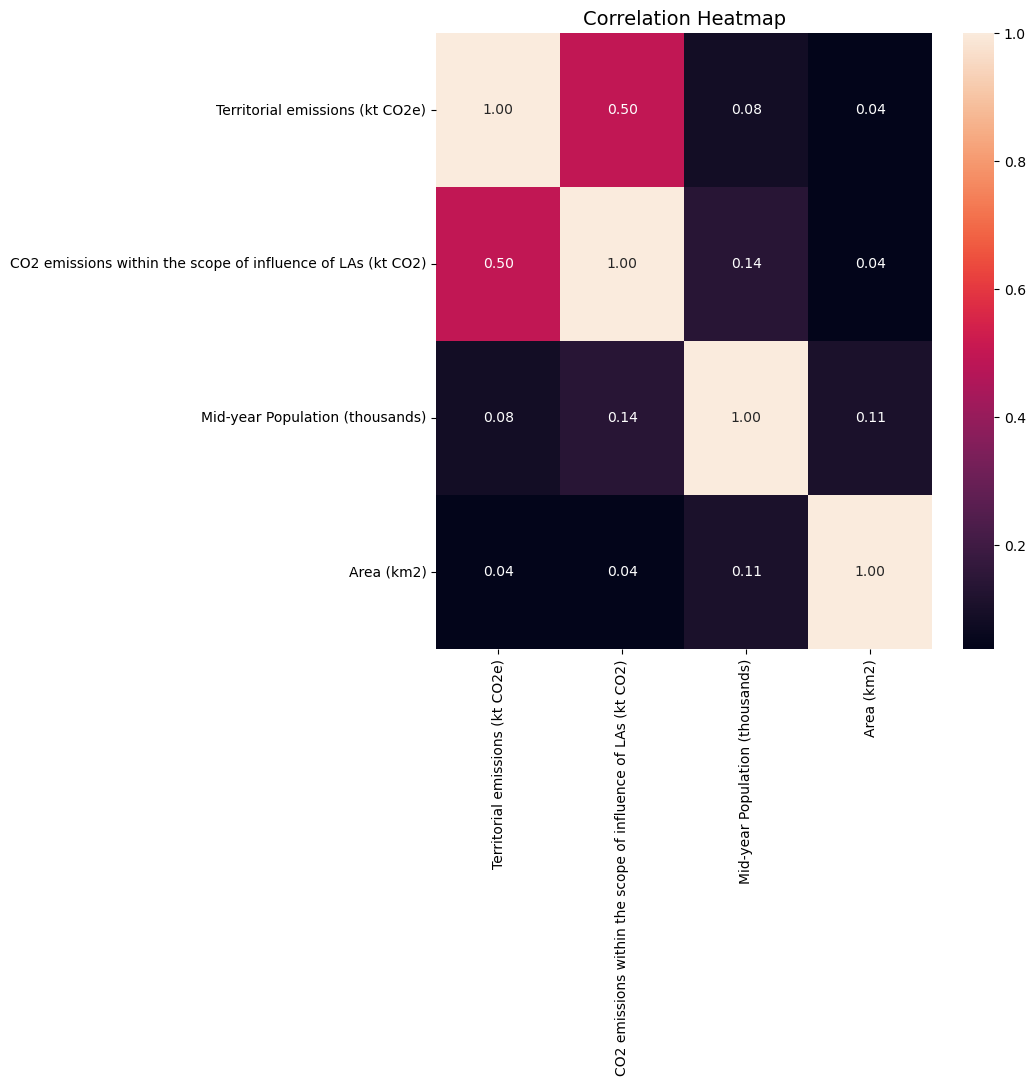

In [19]:
# Creating a correlation heatmap
plt.figure(figsize=(8, 8))
corr_heatmap = sns.heatmap(df_emissions[numeric_columns].corr(), annot = True, fmt = ".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

A correlation coefficient of 0.50 between CO2 emissions within the scope of influence of LAs (kt CO2) and Territorial emissions (kt CO2e) indicates that there is a moderate positive relationship between these two variables, meaning that that as one increases, so does the other. Mid-year Population (thousands) and Territorial emissions (kt CO2e) have a correlation coefficient of 0.08 which indicates that there is no relationship between these two variables. Mid-year Population (thousands) and CO2 emissions within the scope of influence of LAs (kt CO2) have a correlation coefficient of 0.14 which indicates that they have a weak positive relationship. Area (km2) and Territorial emissions (kt CO2e) have a correlation coefficient of 0.04 which indicates that there is no relationship between these two variables. Area (km2) and CO2 emissions within the scope of influence of LAs (kt CO2) have a correlation coefficient of 0.04 which indicates that there is no relationship between these two variables. Area (km2) and Mid-year Population (thousands) have a correlation coefficient of 0.11 which indicates that they have a weak positive relationship.

#### 4. Scatterplot

<Figure size 800x800 with 0 Axes>

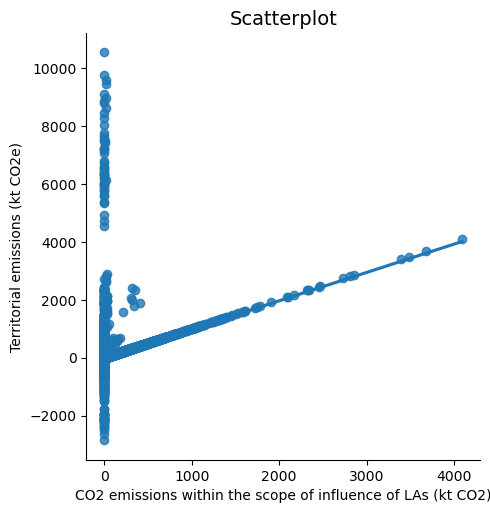

In [22]:
# Creating a scatterplot for CO2 emissions within the scope of influence of LAs (kt CO2) and Territorial emissions (kt CO2e)
plt.figure(figsize=(8, 8))
scatterplot = sns.lmplot(x = 'CO2 emissions within the scope of influence of LAs (kt CO2)', y = 'Territorial emissions (kt CO2e)', data = df_emissions)
plt.title('Scatterplot', fontsize=14)
plt.show()

Many of the data points follow the trendline exactly, many points do not follow the trendline at all, and some points are somewhat close to the trendline. The correlation coefficient of 0.50 between these two variables made it seem like there is a fairly good correlation between both of them, however, the scatterplot makes it seem that approximately half of the data points follow the trendline, and half do not.

#### 5. Pair plot

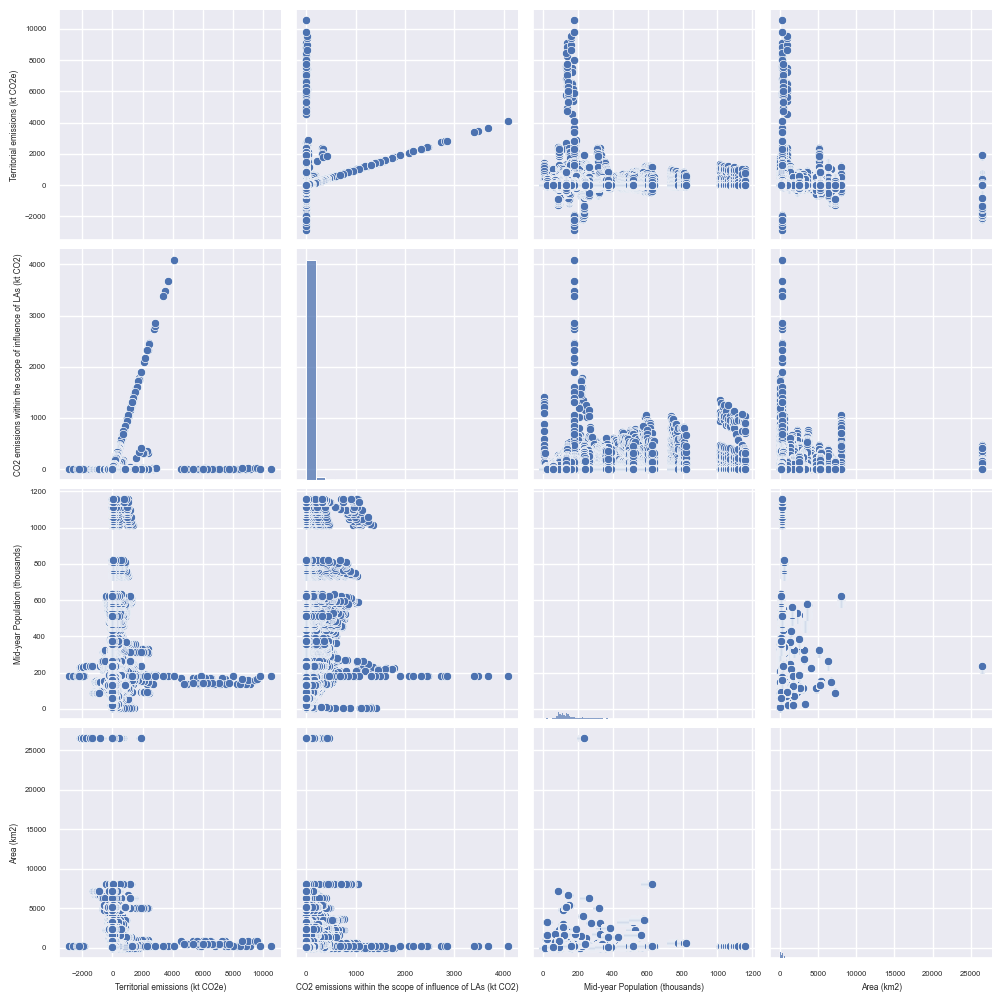

In [58]:
# Creating a pair plot of the numeric variables
pairplot = sns.pairplot(df_emissions[numeric_columns])
plt.tight_layout()
plt.show()

The distribution of data points in each visualization seems to be mostly consistent with the correlation coefficients in that most variables either have a weak relationship or no relationship. Based the pair plot, I would like to further explore the relationships between Mid-year Population (thousands) and CO2 emissions within the scope of influence of LAs (kt CO2), and Mid-year Population (thousands) and Area (km2) because it seems that there may be more to the relationship between these variables than what the correlation coefficient shows.

#### 6. Categorical plot

<Figure size 2000x1500 with 0 Axes>

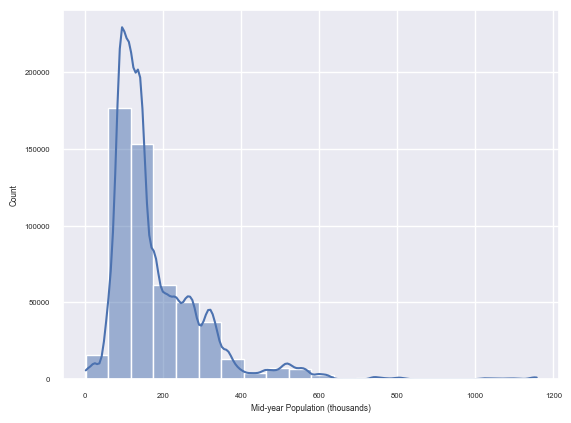

<Figure size 2000x1500 with 0 Axes>

In [201]:
# Creating a histogram for the Mid-year Population (thousands) variables
histogram = sns.histplot(df_emissions['Mid-year Population (thousands)'], bins = 20, kde = True)
plt.figure(figsize=(20, 15))

In [203]:
# Creating the Low population category
df_emissions.loc[df_emissions['Mid-year Population (thousands)'] < 100, 'Population category'] = 'Low population'

In [205]:
# Creating the Middle population category
df_emissions.loc[(df_emissions['Mid-year Population (thousands)'] >= 100) & (df_emissions['Mid-year Population (thousands)'] < 200), 'Population category'] = 'Middle population'

In [207]:
# Creating the High population category
df_emissions.loc[df_emissions['Mid-year Population (thousands)'] >= 200, 'Population category'] = 'High population'

In [209]:
# Checking the value counts for the Population category variable
df_emissions['Population category'].value_counts(dropna = False)

Population category
Middle population    253829
High population      156809
Low population       122378
Name: count, dtype: int64

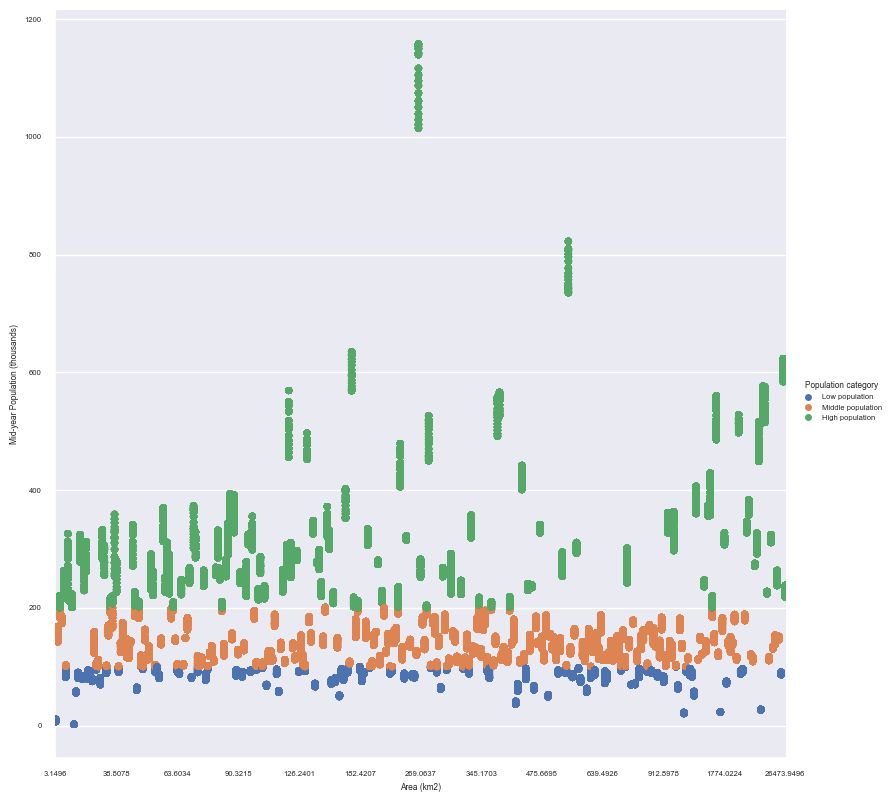

In [215]:
# Creating a categorical plot for the population categories
categorical_plot = sns.catplot(x="Area (km2)", y="Mid-year Population (thousands)", hue="Population category", data=df_emissions, height=8)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))

Many area sizes less than 150 km2 have high populations. There are some area sizes below 15 km2 and above 915 km2 that have very low populations. There are more area sizes above 260 km2 that have have middle populations.

#### 7. Questions

Previous questions that have been answered:
1. Question: Is there a relationship between emissions and land area?
Answer: No, the correlation coefficient is 0.04 which indicates that there is no relationship between these two variables.
2. Question: Does population have an effect on emissions?
Answer: No, the correlation coefficient is 0.08 which indicates that there is no relationship between these two variables.

New questions:
1. Do Mid-year Population (thousands) and Area (km2) have an effect on each other?
2. How does Mid-year Population (thousands) influence CO2 emissions within the scope of influence of LAs (kt CO2)?

#### 8. Hypothesis

If Area (km2) increases, then Mid-year Population (thousands) increases.